# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Asraf Ayyasi Putra
- **Email:** ayyasiasraf@gmail.com
- **ID Dicoding:** asrafayyasi19

## Menentukan Pertanyaan Bisnis

- Bagaimana tren pembelian dari waktu ke waktu?
- Apakah ada tren atau pola tertentu dalam waktu pengiriman? Bagaimana?

## Import Semua Packages/Library yang Digunakan

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Menggunakan beberapa library yang disediakan oleh python untuk membantu perhitungan serta memvisualisasikan apa yang telah saya buat.





## Data Wrangling

### Gathering Data

In [10]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Disini menggunakan library pandas untuk mengimport dataset yang akan digunakan.

### Assessing Data

In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Menggunakan method info() untuk melihat informasi setiap kolom yang ada pada dataset

In [12]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Mengecek apakah ada missing value pada setiap kolom. Terlihat ada missing value yang cukup banyak di beberapa kolom.

In [13]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


Mengecek apakah ada kolom yang duplikat.

In [14]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


melihat informasi lebih detail mengenai dataset.

### Cleaning Data

In [15]:
orders_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


Melakukan drop pada setiap baris yang duplikat. Namun pada dataset kali ini tidak terdapat kolom yang duplikat.

In [16]:
orders_df.dropna(axis=0, inplace=True)

Melakukan drop pada kolom yang terdapat missing value.

In [17]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Mengecek missing value pada kolom yang telah dilakukan drop. Terlihat bahwa sudah tidak ada missing value pada dataset.

## Exploratory Data Analysis (EDA)

### Explore ...

**EDA Pertanyaan 1**

In [18]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

Untuk menjawab pertanyaan 1, maka perlu dilakukan konversi variabel 'order_purchase_timestamp' ke dalam format waktu.

In [19]:
# Extracting month and year
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.month
orders_df['purchase_year'] = orders_df['order_purchase_timestamp'].dt.year

Ekstrak informasi bulan, tahun, atau periode waktu lainnya yang relevan dari kolom timestamp.

In [20]:
# Group by month and year and count the number of purchases
trend_data = orders_df.groupby(['purchase_year', 'purchase_month']).size().reset_index(name='purchase_count')

**EDA PERTANYAAN 2**

In [21]:
# Assuming df is your DataFrame
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

Pastikan kolom yang berisi informasi waktu, seperti order_purchase_timestamp, telah dikonversi ke format waktu jika belum dalam format tersebut.

In [22]:
orders_df['purchase_year'] = orders_df['order_purchase_timestamp'].dt.year
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.month

Ekstrak informasi bulan dan tahun dari kolom waktu yang relevan.

In [23]:
orders_df['delivery_duration'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

Hitung durasi pengiriman sebagai selisih antara order_delivered_customer_date dan order_purchase_timestamp.

In [24]:
trend_pengiriman = orders_df.groupby(['purchase_year', 'purchase_month'])['delivery_duration'].mean().reset_index(name='average_delivery_duration')
trend_pengiriman

,purchase_year,purchase_month,average_delivery_duration
0,2016,9,54.000000
1,2016,10,19.111111
2,2016,12,4.000000
3,2017,1,12.086898
4,2017,2,12.606947
5,2017,3,12.395522
6,2017,4,14.352584
7,2017,5,10.760508
8,2017,6,11.506220
9,2017,7,11.131198


Group data berdasarkan bulan dan tahun, kemudian hitung rata-rata durasi pengiriman.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

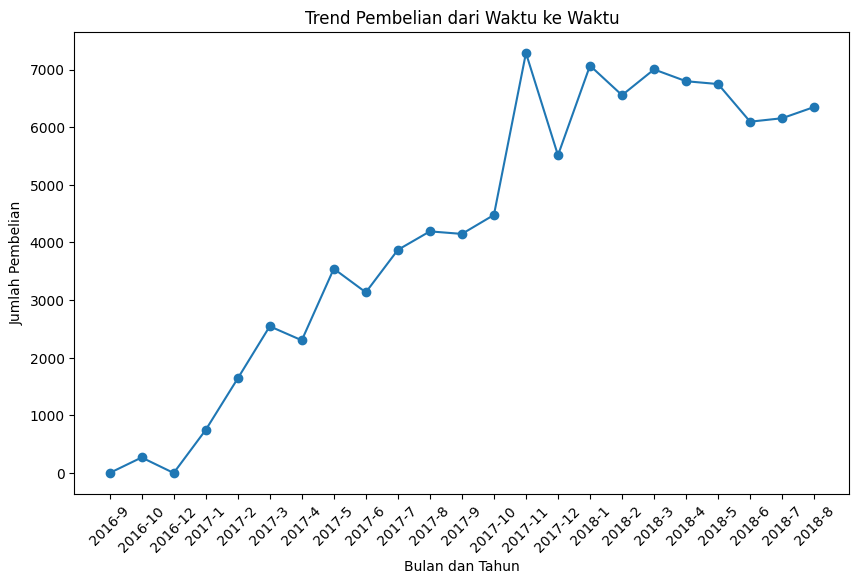

In [25]:
# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(trend_data['purchase_count'], marker='o')
plt.title('Trend Pembelian dari Waktu ke Waktu')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Jumlah Pembelian')
plt.xticks(range(len(trend_data)), [f"{y}-{m}" for y, m in zip(trend_data['purchase_year'], trend_data['purchase_month'])], rotation=45)
plt.show()

### Pertanyaan 2:

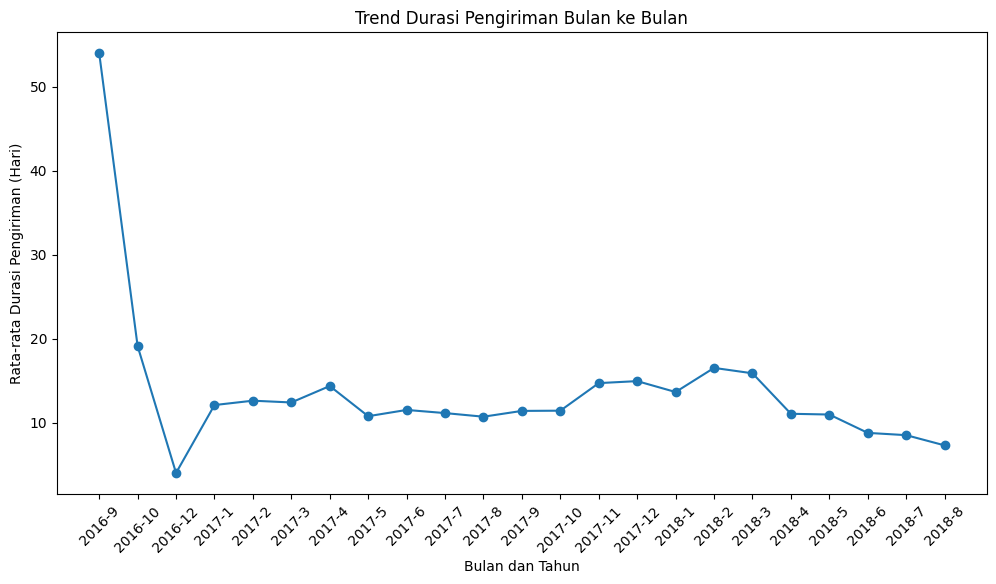

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(trend_pengiriman['purchase_year'].astype(str) + '-' + trend_pengiriman['purchase_month'].astype(str), trend_pengiriman['average_delivery_duration'], marker='o')
plt.title('Trend Durasi Pengiriman Bulan ke Bulan')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Rata-rata Durasi Pengiriman (Hari)')
plt.xticks(rotation=45)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan line chart yang telah divisualisasikan, terlihat bahwa trend pembelian cenderung meningkat. Namun sempat turun pada tahun November 2017, dan kemudian naik kembali. Hingga pada akhirnya trend pembelian berkisar diangka 5000-7000.
- Conclution pertanyaan 2 : Berdasarkan line chart yang telah divisualisasikan, terlihat pada awalnya yaitu pada september 2016 pengiriman dilakukan rata-rata selama leboh 50 hari. Namun, pada mulai November 2016 terjadi perbaikan yang cukup baik, pengiriman mulai memakan waktu yang cukup singkat yaitu berkisar di 1-20 hari saja.

In [27]:
orders_df.to_csv("orders_df_clean.csv", index=False)